In [4]:
import os
os.getcwd()  # Get Working Directory

'C:\\Users\\Russm\\DroneCourse\\ENVS333\\DeepLearn\\final'

In [5]:
%%time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

Using TensorFlow backend.


Wall time: 5.43 s


In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [7]:
# dimensions of our images.
img_width, img_height = 150, 150

In [8]:

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 401
nb_validation_samples = 101
epochs = 10
batch_size = 20

In [9]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [11]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [12]:
training = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
x,y = training.next()

Found 802 images belonging to 2 classes.


In [13]:
y

array([0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0.], dtype=float32)

In [14]:
validation = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

x,y = validation.next()

Found 202 images belonging to 2 classes.


In [15]:
y

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0.], dtype=float32)

In [25]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
#model.add(Conv2D(32, (5, 5)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [27]:
history = model.fit_generator(
    training,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
20/20 [==============================] - 13s 656ms/step - loss: 0.7185 - accuracy: 0.5525 - val_loss: 0.7155 - val_accuracy: 0.4700
Epoch 2/10
20/20 [==============================] - 11s 567ms/step - loss: 0.6092 - accuracy: 0.6832 - val_loss: 0.5425 - val_accuracy: 0.7300
Epoch 3/10
20/20 [==============================] - 12s 590ms/step - loss: 0.6301 - accuracy: 0.6600 - val_loss: 0.6180 - val_accuracy: 0.6707
Epoch 4/10
20/20 [==============================] - 11s 539ms/step - loss: 0.5781 - accuracy: 0.7016 - val_loss: 0.5256 - val_accuracy: 0.7900
Epoch 5/10
20/20 [==============================] - 11s 532ms/step - loss: 0.5243 - accuracy: 0.7775 - val_loss: 0.5683 - val_accuracy: 0.7683
Epoch 6/10
20/20 [==============================] - 10s 520ms/step - loss: 0.4686 - accuracy: 0.7750 - val_loss: 0.4643 - val_accuracy: 0.7000
Epoch 7/10
20/20 [==============================] - 11s 529ms/step - loss: 0.4447 - accuracy: 0.7975 - val_loss: 0.3789 - val_accuracy: 0.8537

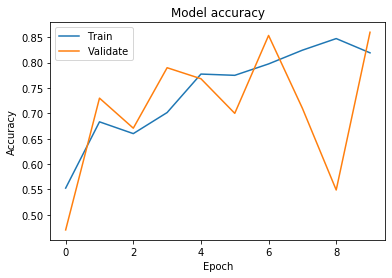

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [20]:
predictions = model.predict(validation)

In [21]:
predictions

array([[0.93076354],
       [0.7891988 ],
       [0.08114481],
       [0.35694596],
       [0.4965586 ],
       [0.3086953 ],
       [0.3362182 ],
       [0.7436199 ],
       [0.7860157 ],
       [0.5145758 ],
       [0.42636713],
       [0.8093331 ],
       [0.91814905],
       [0.65628475],
       [0.82658494],
       [0.5248717 ],
       [0.68909067],
       [0.46299878],
       [0.17977054],
       [0.7353784 ],
       [0.40972796],
       [0.34808657],
       [0.23182249],
       [0.31488356],
       [0.44814655],
       [0.25753886],
       [0.04244899],
       [0.22578008],
       [0.8668105 ],
       [0.5429402 ],
       [0.75585425],
       [0.16974463],
       [0.75322765],
       [0.6886453 ],
       [0.75930494],
       [0.7996142 ],
       [0.20416048],
       [0.17094596],
       [0.88098586],
       [0.42727247],
       [0.39134717],
       [0.6114631 ],
       [0.350307  ],
       [0.23285456],
       [0.53830445],
       [0.52063954],
       [0.31264353],
       [0.055

In [22]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [23]:
newpredictions =  np.rint(predictions)

In [24]:
newpredictions

array([[1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [1.000000],
       [0.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [1.000000],
       [0.000000],
       [1.00